In [2]:
import pandas as pd
import re 
import warnings 

warnings.filterwarnings('ignore')

data = pd.read_csv('/home/liyan/Desktop/Capstone Project_II/Reviews.csv')
data.head(2)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...


In [3]:
df = data.iloc[:, [4,5,9]]
df.head()

,HelpfulnessNumerator,HelpfulnessDenominator,Text
0,1,1,I have bought several of the Vitality canned d...
1,0,0,Product arrived labeled as Jumbo Salted Peanut...
2,1,1,This is a confection that has been around a fe...
3,3,3,If you are looking for the secret ingredient i...
4,0,0,Great taffy at a great price. There was a wid...


In [4]:
df.isnull().sum()

HelpfulnessNumerator      0
HelpfulnessDenominator    0
Text                      0
dtype: int64

In [5]:
df = df[df.HelpfulnessDenominator.values >10]
df.head()

,HelpfulnessNumerator,HelpfulnessDenominator,Text
32,19,19,McCann's Instant Oatmeal is great if you must ...
33,13,13,This is a good instant oatmeal from the best o...
82,15,15,I know the product title says Molecular Gastro...
158,17,19,"<span class=""tiny""> Length:: 0:26 Mins<br /><b..."
287,13,13,"This is a fantastic product, and I wish it was..."


In [6]:
import numpy as np

df['Helpfulness_Ratio']=""
df['Helpfulness_Ratio']=df['HelpfulnessNumerator']/df['HelpfulnessDenominator']


In [7]:
#df.loc[df[df.Score < 3].index,'Feedback'] = 'Negative'

mean = np.mean(df['Helpfulness_Ratio'])
df.loc[df[df.Helpfulness_Ratio >= mean].index,'Helpful'] = 1
df.loc[df[df.Helpfulness_Ratio < mean].index,'Helpful'] = 0
df.head(6)

,HelpfulnessNumerator,HelpfulnessDenominator,Text,Helpfulness_Ratio,Helpful
32,19,19,McCann's Instant Oatmeal is great if you must ...,1.000000,1.0
33,13,13,This is a good instant oatmeal from the best o...,1.000000,1.0
82,15,15,I know the product title says Molecular Gastro...,1.000000,1.0
158,17,19,"<span class=""tiny""> Length:: 0:26 Mins<br /><b...",0.894737,1.0
287,13,13,"This is a fantastic product, and I wish it was...",1.000000,1.0
324,5,19,So we cancelled the order. It was cancelled w...,0.263158,0.0


In [8]:
df = df.reset_index()
df.head(2)

,index,HelpfulnessNumerator,HelpfulnessDenominator,Text,Helpfulness_Ratio,Helpful
0,32,19,19,McCann's Instant Oatmeal is great if you must ...,1.0,1.0
1,33,13,13,This is a good instant oatmeal from the best o...,1.0,1.0


In [9]:
df.iloc[0,5]

1.0

In [10]:
type(df.iloc[0,5])

numpy.float64

In [11]:
df.isnull().sum()

index                     0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Text                      0
Helpfulness_Ratio         0
Helpful                   0
dtype: int64

In [12]:
# convert text to lower case
df.loc[:, 'Text'] = df['Text'].str.lower()

In [13]:
import unicodedata
import sys

tbl = dict.fromkeys(i for i in range(sys.maxunicode)
                      if unicodedata.category(chr(i)).startswith('P'))
def remove_punctuation(text):
    return text.translate(tbl)


In [14]:
#remove digits
from string import digits

def remove_digits(text):
    remove_digits = str.maketrans('', '', digits)
    return text.translate(remove_digits)


In [15]:
# Removing HTML tags
from bs4 import BeautifulSoup

def strip_html_tags(text):
    soup = BeautifulSoup(text, "html.parser")
    stripped_text = soup.get_text()
    return stripped_text


In [16]:
# remove accented characters
import unicodedata 

def remove_accented_chars(text):
    text = unicodedata.normalize('NFKD', text).encode('ascii','ignore').decode('utf-8','ignore')
    return text


In [17]:
# remove special characters

def remove_special_characters(text, remove_digits=False):
    pattern = r'[^a-zA-z0-9\s]' if not remove_digits else r'[^a-zA-z\s]'
    text = re.sub(pattern, '', text)
    return text


In [18]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/liyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [19]:
#remove stop words
from nltk.corpus import stopwords
from stop_words import get_stop_words
from nltk.tokenize.toktok import ToktokTokenizer

tokenizer = ToktokTokenizer()
stopword_list = nltk.corpus.stopwords.words('english')
stopword_list.remove('no')
stopword_list.remove('not')

def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text


In [20]:
def normalize_corpus(corpus, html_stripping=True,
                     accented_char_removal=True, 
                     special_char_removal=True, 
                        stopword_removal=True):
    
    #print("Corpus type: ", type(corpus))
    #print("Corpus length: ", len(corpus))
    
    normalized_corpus = []
    
    # normalize each document in the corpus
    for doc in corpus:
        # strip HTML
        if html_stripping:
            doc = strip_html_tags(doc)
        # remove accented characters
        if accented_char_removal:
            doc = remove_accented_chars(doc)
        # remove extra newlines
        doc = re.sub(r'[\r|\n|\r\n]+', ' ',doc)
        # remove special characters and\or digits    
        if special_char_removal:
            # insert spaces between special characters to isolate them    
            special_char_pattern = re.compile(r'([{.(-)!}])')
            doc = special_char_pattern.sub(" \\1 ", doc)
            doc = remove_special_characters(doc, remove_digits)  
        # remove extra whitespace
        doc = re.sub(' +', ' ', doc)
        # remove stopwords
        if stopword_removal:
            doc = remove_stopwords(doc)
        #doc = doc.to_string      
        
        normalized_corpus.append(doc)

    return normalized_corpus
        

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report

In [22]:
from sklearn import metrics

def get_metrics(true_labels, predicted_labels):
    
    print('Accuracy:', np.round(
                        metrics.accuracy_score(true_labels, 
                                               predicted_labels),
                        4))
    print('Precision:', np.round(
                        metrics.precision_score(true_labels, 
                                               predicted_labels,
                                               average='weighted'),
                        4))
    print('Recall:', np.round(
                        metrics.recall_score(true_labels, 
                                               predicted_labels,
                                               average='weighted'),
                        4))
    print('F1 Score:', np.round(
                        metrics.f1_score(true_labels, 
                                               predicted_labels,
                                               average='weighted'),
                        4))


In [23]:
def display_confusion_matrix(true_labels, predicted_labels, classes=[1,0]):
    
    total_classes = len(classes)
    level_labels = [total_classes*[0], list(range(total_classes))]

    cm = metrics.confusion_matrix(y_true=true_labels, y_pred=predicted_labels, 
                                  labels=classes)
    cm_frame = pd.DataFrame(data=cm, 
                            columns=pd.MultiIndex(levels=[['Predicted:'], classes], 
                                                  labels=level_labels), 
                            index=pd.MultiIndex(levels=[['Actual:'], classes], 
labels=level_labels)) 

    print(cm_frame)     

In [24]:
def display_classification_report(true_labels, predicted_labels, classes=[1,0]):

    report = metrics.classification_report(y_true=true_labels, 
                                           y_pred=predicted_labels, 
labels=classes) 
    print(report)

In [25]:
import numpy as np

def display_model_performance_metrics(true_labels, predicted_labels, classes=[1,0]):
    print('Model Performance metrics:')
    print('-'*30)
    get_metrics(true_labels=true_labels, predicted_labels=predicted_labels)
    print('\nModel Classification report:')
    print('-'*30)
    display_classification_report(true_labels=true_labels, predicted_labels=predicted_labels, 
                                  classes=classes)
    print('\nPrediction Confusion Matrix:')
    print('-'*30)
    display_confusion_matrix(true_labels=true_labels, predicted_labels=predicted_labels, 
classes=classes)

In [26]:

clean_text = normalize_corpus(df.Text)



In [27]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()  #Convert a collection of text documents to a matrix of token counts
X = vectorizer.fit_transform(clean_text) # a list of integers transformed from all text
y = df.Helpful


In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.30)

In [29]:
doc_sum = X_train.toarray().sum(axis = 0) # The number of times each word is occuring over all the documents.
len_text = len(doc_sum) # number of unique words in all documents

In [30]:
import matplotlib.pyplot as plt
N = 50 
x_ax = np.arange(0,len_text)[:N] # [:N] changes this to only run for x_i values from 0 to 100 
y_ax = [sum(doc_sum <= i)/len_text for i in x_ax]# Determines the percentage values for y_i 

plt.plot(x_ax, y_ax) 
plt.xlabel('number of docs') 
plt.ylabel('% of words') 
plt.title('% of Words That Appear In <= X Documents, N = 50')


Text(0.5,1,'% of Words That Appear In <= X Documents, N = 50')

In [31]:
train_docs, test_docs, y_train, y_test = train_test_split(np.array(clean_text), y, test_size= 0.30)

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer

tv = TfidfVectorizer(min_df=5, max_df=1.0, use_idf=True)
X_train = tv.fit_transform(train_docs)
X_test = tv.transform(test_docs)

In [33]:
from sklearn.naive_bayes import MultinomialNB

clf_nb = MultinomialNB().fit(X_train, y_train)
# MultinomialNB() is for classification with dicrete features. In this case, freshness and text in integers.


In [34]:
print ('Accuracy on training set: {}'.format(clf_nb.score(X_train, y_train)))
print ('Accuracy on testing set:  {}'.format(clf_nb.score(X_test, y_test)))

Accuracy on training set: 0.7836794462193823
Accuracy on testing set:  0.744836154682404


In [35]:
y_pred = clf_nb.predict(X_test)

In [36]:
display_model_performance_metrics(true_labels= y_test, predicted_labels= y_pred, 
                                      classes=[0,1])

Model Performance metrics:
------------------------------
Accuracy: 0.7448
Precision: 0.7648
Recall: 0.7448
F1 Score: 0.6987

Model Classification report:
------------------------------
             precision    recall  f1-score   support

          0       0.83      0.27      0.41      2099
          1       0.73      0.97      0.84      4340

avg / total       0.76      0.74      0.70      6439


Prediction Confusion Matrix:
------------------------------
          Predicted:      
                   0     1
Actual: 0        577  1522
        1        121  4219


In [37]:
from sklearn.cross_validation import train_test_split
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error


In [38]:
# multiple logistics regression 

clf_log = LogisticRegression(random_state= 1, max_iter=2000, 
                                multi_class='ovr', 
                                #n_jobs=4, 
                                solver='newton-cg',penalty='l2', 
                                class_weight='balanced')

In [39]:
clf_log.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=2000,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=1,
          solver='newton-cg', tol=0.0001, verbose=0, warm_start=False)

In [40]:
from sklearn.metrics import mean_squared_error

y_pred = clf_log.predict(X_test)


In [41]:
print ('Accuracy on training set: {}'.format(clf_log.score(X_train, y_train)))
print ('Accuracy on testing set:  {}'.format(clf_log.score(X_test, y_test)))

Accuracy on training set: 0.8646831735889244
Accuracy on testing set:  0.8030750116477714


In [42]:
display_model_performance_metrics(true_labels= y_test, predicted_labels= y_pred, 
                                      classes=[0,1])

Model Performance metrics:
------------------------------
Accuracy: 0.8031
Precision: 0.8155
Recall: 0.8031
F1 Score: 0.8066

Model Classification report:
------------------------------
             precision    recall  f1-score   support

          0       0.67      0.79      0.72      2099
          1       0.89      0.81      0.85      4340

avg / total       0.82      0.80      0.81      6439


Prediction Confusion Matrix:
------------------------------
          Predicted:      
                   0     1
Actual: 0       1648   451
        1        817  3523


In [43]:
#SVM
import numpy as np
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt

clf_svc = LinearSVC(C=10)
clf_svc_model = clf_svc.fit(X_train, y_train)

y_c = clf_svc_model.predict(X_test)

In [44]:
print ('Accuracy on training set: {}'.format(clf_svc_model.score(X_train, y_train)))
print ('Accuracy on testing set:  {}'.format(clf_svc_model.score(X_test, y_test)))

Accuracy on training set: 0.9949414270500533
Accuracy on testing set:  0.8077341202050008


In [45]:
display_model_performance_metrics(true_labels= y_test, predicted_labels= y_c, 
                                      classes=[0,1])

Model Performance metrics:
------------------------------
Accuracy: 0.8077
Precision: 0.8087
Recall: 0.8077
F1 Score: 0.8082

Model Classification report:
------------------------------
             precision    recall  f1-score   support

          0       0.70      0.71      0.71      2099
          1       0.86      0.85      0.86      4340

avg / total       0.81      0.81      0.81      6439


Prediction Confusion Matrix:
------------------------------
          Predicted:      
                   0     1
Actual: 0       1499   600
        1        638  3702


In [46]:
#decision tree
import numpy as np
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

# Fit regression model
clf_1 = DecisionTreeClassifier()
clf_2 = DecisionTreeClassifier(max_depth=5)
clf_1.fit(X_train, y_train)
clf_2.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [47]:
print ('Tree One, Accuracy on training set: {}'.format(clf_1.score(X_train, y_train)))
print ('Tree One, Accuracy on testing set:  {}'.format(clf_1.score(X_test, y_test)))

Tree One, Accuracy on training set: 0.998269435569755
Tree One, Accuracy on testing set:  0.7876999534089144


In [48]:
print ('Tree Two, Accuracy on training set: {}'.format(clf_2.score(X_train, y_train)))
print ('Tree Two, on testing set:  {}'.format(clf_2.score(X_test, y_test)))

Tree Two, Accuracy on training set: 0.6980830670926518
Tree Two, on testing set:  0.6842677434384221


In [49]:
y_1 = clf_1.predict(X_test)
y_2 = clf_2.predict(X_test)

In [50]:
display_model_performance_metrics(true_labels= y_test, predicted_labels= y_1, 
                                      classes=[0,1])

Model Performance metrics:
------------------------------
Accuracy: 0.7877
Precision: 0.7882
Recall: 0.7877
F1 Score: 0.7879

Model Classification report:
------------------------------
             precision    recall  f1-score   support

          0       0.67      0.68      0.68      2099
          1       0.84      0.84      0.84      4340

avg / total       0.79      0.79      0.79      6439


Prediction Confusion Matrix:
------------------------------
          Predicted:      
                   0     1
Actual: 0       1425   674
        1        693  3647


In [51]:
display_model_performance_metrics(true_labels= y_test, predicted_labels= y_2, 
                                      classes=[0,1])

Model Performance metrics:
------------------------------
Accuracy: 0.6843
Precision: 0.7003
Recall: 0.6843
F1 Score: 0.5752

Model Classification report:
------------------------------
             precision    recall  f1-score   support

          0       0.74      0.05      0.09      2099
          1       0.68      0.99      0.81      4340

avg / total       0.70      0.68      0.58      6439


Prediction Confusion Matrix:
------------------------------
          Predicted:      
                   0     1
Actual: 0        103  1996
        1         37  4303


In [52]:
# Random Forests
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_regression
import numpy as np

clf_rf = RandomForestClassifier(random_state=1)
clf_rf.fit(X_train, y_train)

feature_names = tv.get_feature_names()

clf_rf_feature_importances = clf_rf.feature_importances_
clf_rf_feature_names, clf_rf_feature_scores = zip(*sorted(zip(feature_names, clf_rf_feature_importances), 
                                                          key=lambda x: -x[1]))


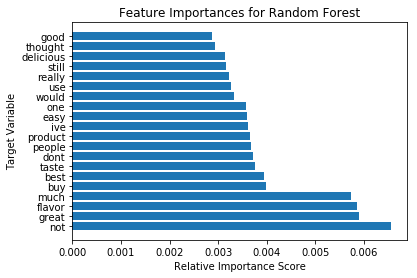

In [53]:
plt.barh(clf_rf_feature_names[:20], clf_rf_feature_scores[:20])
#y_position = list(range(len(clf_rf_feature_names)))
#plt.yticks(clf_rf_feature_names, y_position)
plt.xlabel('Relative Importance Score')
plt.ylabel('Target Variable')
t = plt.title('Feature Importances for Random Forest')

In [54]:
y_pred = clf_rf.predict(X_test)

In [55]:
print ('Accuracy on training set: {}'.format(clf_rf.score(X_train, y_train)))
print ('Accuracy on testing set:  {}'.format(clf_rf.score(X_test, y_test)))

Accuracy on training set: 0.9925452609158679
Accuracy on testing set:  0.8142568721851219


In [56]:
display_model_performance_metrics(true_labels= y_test, predicted_labels= y_pred, 
                                      classes=[0,1])

Model Performance metrics:
------------------------------
Accuracy: 0.8143
Precision: 0.8101
Recall: 0.8143
F1 Score: 0.8095

Model Classification report:
------------------------------
             precision    recall  f1-score   support

          0       0.76      0.63      0.69      2099
          1       0.84      0.90      0.87      4340

avg / total       0.81      0.81      0.81      6439


Prediction Confusion Matrix:
------------------------------
          Predicted:      
                   0     1
Actual: 0       1329   770
        1        426  3914


In [57]:
# Gradient Boosting
import numpy as np
import matplotlib.pyplot as plt

from sklearn import ensemble
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingClassifier

params = {'n_estimators':50, 'max_depth': 3, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}

params = {'n_estimators':50}

clf_gb = ensemble.GradientBoostingClassifier(**params)

clf_gb.fit(X_train, y_train)

feature_names = tv.get_feature_names()

clf_gb_feature_importances = clf_gb.feature_importances_
clf_gb_feature_names, clf_gb_feature_scores = zip(*sorted(zip(feature_names, clf_gb_feature_importances), 
                                                          key=lambda x: -x[1]))


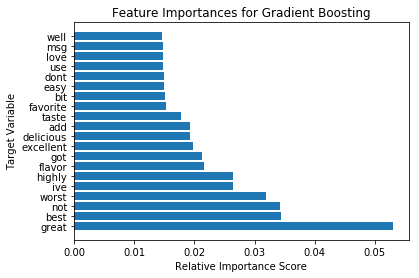

In [58]:
plt.barh(clf_gb_feature_names[:20], clf_gb_feature_scores[:20])
#plt.yticks(clf_rf_feature_names, y_position)
plt.xlabel('Relative Importance Score')
plt.ylabel('Target Variable')
t = plt.title('Feature Importances for Gradient Boosting')

In [59]:
y_pred = clf_gb.predict(X_test)

In [60]:
print ('Accuracy on training set: {}'.format(clf_gb.score(X_train, y_train)))
print ('Accuracy on testing set:  {}'.format(clf_gb.score(X_test, y_test)))

Accuracy on training set: 0.7348908413205538
Accuracy on testing set:  0.7199875757105141


In [61]:
display_model_performance_metrics(true_labels= y_test, predicted_labels= y_pred, 
                                      classes=[0,1])

Model Performance metrics:
------------------------------
Accuracy: 0.72
Precision: 0.754
Recall: 0.72
F1 Score: 0.6503

Model Classification report:
------------------------------
             precision    recall  f1-score   support

          0       0.84      0.17      0.29      2099
          1       0.71      0.98      0.83      4340

avg / total       0.75      0.72      0.65      6439


Prediction Confusion Matrix:
------------------------------
          Predicted:      
                   0     1
Actual: 0        364  1735
        1         68  4272


In [62]:
# SGDC classifier
from sklearn import linear_model

clf_sgdc = linear_model.SGDClassifier()
clf_sgdc.fit(X_train, y_train)
y_pred = clf_sgdc.predict(X_test)

In [63]:
print ('Accuracy on training set: {}'.format(clf_sgdc.score(X_train, y_train)))
print ('Accuracy on testing set:  {}'.format(clf_sgdc.score(X_test, y_test)))

Accuracy on training set: 0.8866480298189563
Accuracy on testing set:  0.8136356577108247


In [64]:
display_model_performance_metrics(true_labels= y_test, predicted_labels= y_pred, 
                                      classes=[0,1])

Model Performance metrics:
------------------------------
Accuracy: 0.8136
Precision: 0.8097
Recall: 0.8136
F1 Score: 0.8073

Model Classification report:
------------------------------
             precision    recall  f1-score   support

          0       0.77      0.61      0.68      2099
          1       0.83      0.91      0.87      4340

avg / total       0.81      0.81      0.81      6439


Prediction Confusion Matrix:
------------------------------
          Predicted:      
                   0     1
Actual: 0       1282   817
        1        383  3957


Grid Search Hyper-parameter Tuning

In [65]:
# LinearSVC
from sklearn.model_selection import GridSearchCV

svc_params_grid = {"C": [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                   "class_weight":['balanced']}

grid_cv_svc = GridSearchCV(clf_svc, svc_params_grid, n_jobs=4, cv=5, return_train_score=True)
grid_cv_svc.fit(X_train, y_train)

print("R-Squared::{}".format(grid_cv_svc.best_score_))
print("Best Hyperparameters::\n{}".format(grid_cv_svc.best_params_))

R-Squared::0.8081735889243876
Best Hyperparameters::
{'C': 1, 'class_weight': 'balanced'}


In [66]:
print ('Accuracy on training set: {}'.format(grid_cv_svc.score(X_train, y_train)))
print ('Accuracy on testing set:  {}'.format(grid_cv_svc.score(X_test, y_test)))

Accuracy on training set: 0.94475505857295
Accuracy on testing set:  0.8142568721851219


In [67]:
y_pred = grid_cv_svc.predict(X_test)

display_model_performance_metrics(true_labels= y_test, predicted_labels= y_pred, 
                                      classes=[0,1])

Model Performance metrics:
------------------------------
Accuracy: 0.8143
Precision: 0.8217
Recall: 0.8143
F1 Score: 0.8167

Model Classification report:
------------------------------
             precision    recall  f1-score   support

          0       0.69      0.77      0.73      2099
          1       0.88      0.83      0.86      4340

avg / total       0.82      0.81      0.82      6439


Prediction Confusion Matrix:
------------------------------
          Predicted:      
                   0     1
Actual: 0       1626   473
        1        723  3617


In [68]:
#sgdc
sgdc_params_grid = {"penalty": ['l1','l2','elasticnet'],
                   "class_weight":['balanced']}

grid_cv_sgdc = GridSearchCV(clf_sgdc, sgdc_params_grid, n_jobs=4, cv=5, return_train_score=True)

grid_cv_sgdc.fit(X_train, y_train)

print("R-Squared::{}".format(grid_cv_sgdc.best_score_))
print("Best Hyperparameters::\n{}".format(grid_cv_sgdc.best_params_))


R-Squared::0.7997870074547391
Best Hyperparameters::
{'class_weight': 'balanced', 'penalty': 'l2'}


In [69]:
print ('Accuracy on training set: {}'.format(grid_cv_sgdc.score(X_train, y_train)))
print ('Accuracy on testing set:  {}'.format(grid_cv_sgdc.score(X_test, y_test)))

Accuracy on training set: 0.8787939297124601
Accuracy on testing set:  0.805870476782109


In [70]:
y_pred = grid_cv_svc.predict(X_test)

display_model_performance_metrics(true_labels= y_test, predicted_labels= y_pred, 
                                      classes=[0,1])

Model Performance metrics:
------------------------------
Accuracy: 0.8143
Precision: 0.8217
Recall: 0.8143
F1 Score: 0.8167

Model Classification report:
------------------------------
             precision    recall  f1-score   support

          0       0.69      0.77      0.73      2099
          1       0.88      0.83      0.86      4340

avg / total       0.82      0.81      0.82      6439


Prediction Confusion Matrix:
------------------------------
          Predicted:      
                   0     1
Actual: 0       1626   473
        1        723  3617


In [71]:
#RF
rf_param_grid = {'n_estimators': [200],
                 "class_weight":['balanced']
              #"criterion": ["mse"],
              #"min_samples_split": [2, 3],
              #"max_features": ['auto','log2', None]
              #"max_depth": [3, 4],
              #"min_samples_leaf": [10, 20, 30],
              #"max_leaf_nodes": [20,40,60]
             }

grid_cv_rf = GridSearchCV(clf_rf, rf_param_grid, n_jobs=1, cv=5, return_train_score=True)

grid_cv_rf.fit(X_train, y_train)

print("R-Squared::{}".format(grid_cv_rf.best_score_))
print("Best Hyperparameters::\n{}".format(grid_cv_rf.best_params_))

R-Squared::0.8268104366347178
Best Hyperparameters::
{'class_weight': 'balanced', 'n_estimators': 200}


In [72]:
print ('Accuracy on training set: {}'.format(grid_cv_rf.score(X_train, y_train)))
print ('Accuracy on testing set:  {}'.format(grid_cv_rf.score(X_test, y_test)))

Accuracy on training set: 0.998269435569755
Accuracy on testing set:  0.8378630222084175


In [73]:
y_pred = grid_cv_rf.predict(X_test)

display_model_performance_metrics(true_labels= y_test, predicted_labels= y_pred, 
                                      classes=[0,1])

Model Performance metrics:
------------------------------
Accuracy: 0.8379
Precision: 0.8387
Recall: 0.8379
F1 Score: 0.8301

Model Classification report:
------------------------------
             precision    recall  f1-score   support

          0       0.84      0.62      0.71      2099
          1       0.84      0.95      0.89      4340

avg / total       0.84      0.84      0.83      6439


Prediction Confusion Matrix:
------------------------------
          Predicted:      
                   0     1
Actual: 0       1292   807
        1        237  4103


In [74]:
#logistic regression
log_param_grid = {
                  "C": [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                  "class_weight":['balanced']
                 }

grid_cv_log = GridSearchCV(clf_log, log_param_grid, n_jobs=1, cv=5, return_train_score=True)

grid_cv_log.fit(X_train, y_train)

print("R-Squared::{}".format(grid_cv_log.best_score_))
print("Best Hyperparameters::\n{}".format(grid_cv_log.best_params_))

R-Squared::0.810636315228967
Best Hyperparameters::
{'C': 10, 'class_weight': 'balanced'}


In [75]:
print ('Accuracy on training set: {}'.format(grid_cv_log.score(X_train, y_train)))
print ('Accuracy on testing set:  {}'.format(grid_cv_log.score(X_test, y_test)))

Accuracy on training set: 0.9450878594249201
Accuracy on testing set:  0.8165864264637366


In [76]:
y_pred = grid_cv_log.predict(X_test)

display_model_performance_metrics(true_labels= y_test, predicted_labels= y_pred, 
                                      classes=[0,1])

Model Performance metrics:
------------------------------
Accuracy: 0.8166
Precision: 0.8237
Recall: 0.8166
F1 Score: 0.819

Model Classification report:
------------------------------
             precision    recall  f1-score   support

          0       0.70      0.78      0.73      2099
          1       0.89      0.84      0.86      4340

avg / total       0.82      0.82      0.82      6439


Prediction Confusion Matrix:
------------------------------
          Predicted:      
                   0     1
Actual: 0       1630   469
        1        712  3628
